# Assignment: Working with Data

>Using the data below, answer the following questions:

>1) Which entities (top 5) had the largest population density in 2020?
>2) Which entities have more water area than land area? 
>3) Which entities increased in population the most in the last 10 years?
>4) What state bird accounts for the largest population as of 2020? Land area?
>5) How many entities' largest city is their capital city?
>6) Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [25]:
import pandas as pd

In [26]:
facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
facts.head(5)


,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198956.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32197.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1660272,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197881,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0


In [27]:
facts[['State','Pop_2020','Area_land']]
facts['density'] = facts['Pop_2020']/facts['Area_land']
facts.sort_values(by= 'density',ascending = False, inplace=True)
facts[['State','Pop_2020','Area_land','density']].head(5)

,State,Pop_2020,Area_land,density
9,District of Columbia,689545.0,158,4364.208861
32,New Jersey,9288994.0,19047,487.688035
43,Rhode Island,1097379.0,2678,409.775579
42,Puerto Rico,3285874.0,8868,370.531574
23,Massachusetts,7029917.0,20202,347.981239


In [28]:
facts[(facts['Area_water'] > facts['Area_land'])]

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,density
48,United States Virgin Islands,1898,348,1550,106235.0,106405,1*,California gull,Yellow Elder,United in Pride and Hope,...,18481,Sion Farm3,13003.0,Northside3,10049.0,East End3,5128.0,Southcentral3,3277.0,305.272989
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0,249.681818
12,Guam,1478,543,935,168.4,159358,1*,Guam rail (ko'ko'),Bougainvillea spectabilis,Where America's Day Begins,...,44943,Yigo,20539.0,Tamuning,19685.0,Mangilao,15191.0,Barrigada,8875.0,0.310129
37,Northern Mariana Islands,5117,472,4644,51.0,53883,1*,Mariana fruit-dove,Flores mayo,NaN,...,48220,Tinian2,3136.0,Rota2,2527.0,Northern Islands2,0.0,NaN,NaN,0.108051


In [29]:
facts['increase'] = facts['Pop_2020'] - facts['Pop_2010']
facts.sort_values(by= 'increase',ascending = False, inplace=True)
facts[['State','Pop_2020','Pop_2010','increase']].head()

,State,Pop_2020,Pop_2010,increase
47,Texas,29145505.0,25145561,3999944.0
10,Florida,21538187.0,18801310,2736877.0
5,California,39538223.0,37253956,2284267.0
11,Georgia,10711908.0,9687653,1024255.0
52,Washington,7705281.0,6724540,980741.0


In [30]:
facts.sort_values(by='Pop_2020',ascending = False,inplace=True)
facts[['Pop_2020','State_bird']].head(1)

,Pop_2020,State_bird
5,39538223.0,California quail


In [31]:
facts.sort_values(by='Area_land',ascending = False,inplace=True)
facts[['State_bird','Area_land']].head(1)

,State_bird,Area_land
1,Willow ptarmigan,1477953


In [32]:
facts.columns
sum(facts['Capital_pop'] -- facts['city_1_pop'])

55036045

In [36]:
facts['percent_drop'] = 100 - (facts['city_1_pop']-facts['city_5_pop'])/facts['city_1_pop']
facts.sort_values(by= 'percent_drop',ascending = False,inplace=True)
facts[['State','city_1_pop','city_5_pop','percent_drop']].head(1)

,State,city_1_pop,city_5_pop,percent_drop
7,Connecticut,144900,108093.0,99.745983


>Using the "state_dates.tsv" data, answer the remaining questions. You will need to merge the two data sets together:

>7) Of the states that joined the United States before 1790, what is the most common state flower?
>8) Which has the larger population density, the most dense US Territory or the least dense state?
>9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
>10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

Hint: `pd.read_csv('../data/state_dates.tsv',delimiter="\t")`

Hint: You likely want to convert the Date column to datetime. You might have to correct errors in the data as well.

Hint: `states['Date']<pd.datetime(1790,1,1)`

Hint: `pd.merge(****,****,left_on='USPS_code',right_on='Abbreviation',how='outer')`

In [28]:
import matplotlib as plt

In [29]:
state = pd.read_csv('../data/state_dates.tsv',delimiter="\t")
state

,Name,Date,Status,Abbreviation
0,Alabama,"December 14, 1819",State,AL
1,Alaska,"January 3, 1959",State,AK
2,American Samoa,"April 17, 1900",Territory,AS
3,Arizona,"February 14, 1912",State,AZ
4,Arkansas,"June 15, 1836",State,AR
5,California,"September 9, 1850",State,CA
6,Colorado,"August 1, 1876",State,CO
7,Connecticut,"January 9, 1788",State,CT
8,Delaware,"December 7, 1787",State,DE
9,District of Columbia,"February 21, 1871",Federal District,DC


In [30]:
table = pd.merge(facts, state,left_on='USPS_code',right_on='Abbreviation',how='outer')
table

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_4,city_4_pop,City_5,city_5_pop,density,increase,Name,Date,Status,Abbreviation
0,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Wasilla,10529.0,Sitka,8647.0,0.496221,23160.0,Alaska,"January 3, 1959",State,AK
1,Texas,695662,676587,19075,29145505.0,25145561,38,Northern mockingbird,Bluebonnet sp.,Friendship,...,Austin,993649.0,Fort Worth,902938.0,43.077247,3999944.0,Texas,"December 29, 1845",State,TX
2,California,423967,403466,20501,39538223.0,37253956,52,California quail,California poppy,Eureka,...,San Francisco,884198.0,Fresno,530093.0,97.996419,2284267.0,California,"September 9, 1850",State,CA
3,Montana,380831,376962,3869,1084225.0,989415,2,Western meadowlark,Bitterroot,Oro y plata,...,Bozeman,48532.0,Butte,34284.0,2.876218,94810.0,Montana,"November 8, 1889",State,MT
4,New Mexico,314917,314161,757,2117522.0,2059179,3,Greater roadrunner,Yucca flower,Crescit eundo,...,Santa Fe,94528.0,Roswell,47635.0,6.740245,58343.0,New Mexico,"January 6, 1912",State,NM
5,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Chandler,257165.0,Scottsdale,255310.0,24.307722,759485.0,Arizona,"February 14, 1912",State,AZ
6,Nevada,286380,284332,2048,3104614.0,2700551,4,Mountain bluebird,Sagebrush,All for our country,...,North Las Vegas,246133.0,Paradise,219178.0,10.918975,404063.0,Nevada,"October 31, 1864",State,NV
7,Colorado,269601,268431,1170,5773714.0,5029196,8,Lark bunting,Rocky Mountain columbine,Nil sine numine,...,Fort Collins,167830.0,Lakewood,156798.0,21.509118,744518.0,Colorado,"August 1, 1876",State,CO
8,Wyoming,253335,251470,1864,576851.0,563626,1,Western meadowlark,Indian paintbrush,Equal Rights and Cedant arma togae.,...,Gillette,31903.0,Rock Springs,23082.0,2.293916,13225.0,Wyoming,"July 10, 1890",State,WY
9,Oregon,254799,248608,6191,4237256.0,3831074,6,Western meadowlark,Oregon grape,"The Union, and Alis volat propriis",...,Gresham,110158.0,Hillsboro,108389.0,17.043925,406182.0,Oregon,"February 14, 1859",State,OR


In [31]:
table['dateFixed'] = pd.to_datetime(table['Date'], errors = 'raise')
q7 = table[table['dateFixed'] < pd.datetime(1790,1,1)]
q7['State_flower'].value_counts().head(1)

Mountain laurel    2
Name: State_flower, dtype: int64

In [32]:
#territory with highest population density
temp = table[table['Status'].str.contains('Territory')]
temp[['State','density','Status']].head(1)

,State,density,Status
48,Puerto Rico,370.531574,Territory


In [33]:
#state with lowest population density
temp1 = table[table['Status'].str.contains('State')]
temp1[['State','density']].sort_values(by='density',ascending = True).head(1)

,State,density
0,Alaska,0.496221


In [15]:
Question 9

SyntaxError: invalid syntax (<ipython-input-15-aafd61d550eb>, line 1)

In [20]:
table.columns

Index(['State', 'Area_tot', 'Area_land', 'Area_water', 'Pop_2020', 'Pop_2010',
       'Rep_seats', 'State_bird', 'State_flower', 'State_motto', 'Motto_trans',
       'USPS_code', 'GDP_2020', 'GDP_2019', 'Capital', 'Capital_pop', 'City_1',
       'city_1_pop', 'City_2', 'city_2_pop', 'City_3', 'city_3_pop', 'City_4',
       'city_4_pop', 'City_5', 'city_5_pop', 'increase', 'Name', 'Date',
       'Status', 'Abbreviation'],
      dtype='object')

In [58]:
table.columns

Index(['State', 'Area_tot', 'Area_land', 'Area_water', 'Pop_2020', 'Pop_2010',
       'Rep_seats', 'State_bird', 'State_flower', 'State_motto', 'Motto_trans',
       'USPS_code', 'GDP_2020', 'GDP_2019', 'Capital', 'Capital_pop', 'City_1',
       'city_1_pop', 'City_2', 'city_2_pop', 'City_3', 'city_3_pop', 'City_4',
       'city_4_pop', 'City_5', 'city_5_pop', 'density', 'increase', 'Name',
       'Date', 'Status', 'Abbreviation', 'dateFixed'],
      dtype='object')

In [59]:
table=table.sort_values(by='dateFixed')

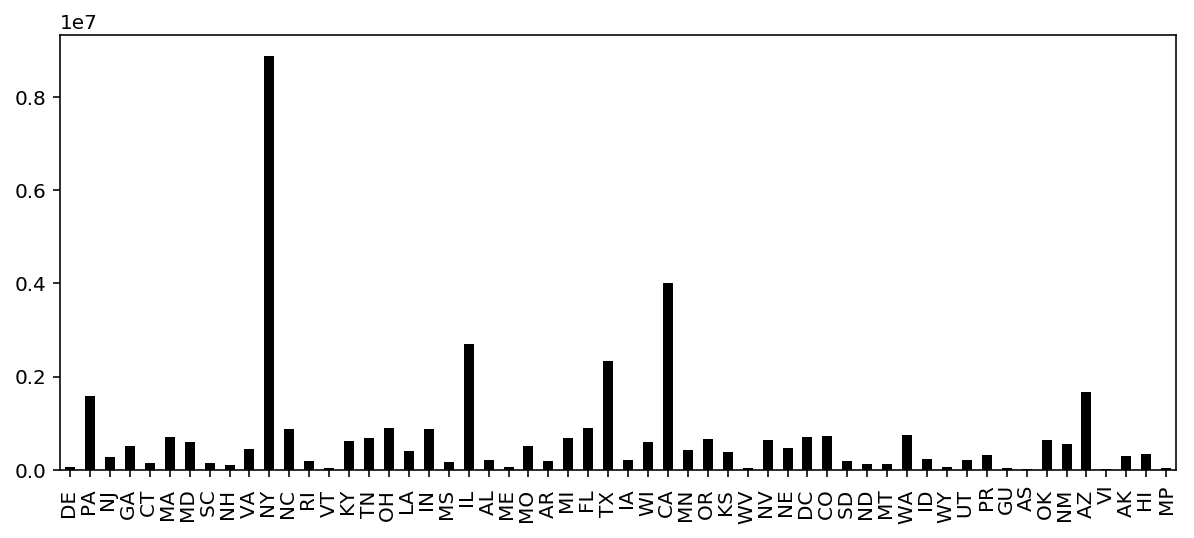

In [60]:
import matplotlib as plt
%config InlineBackend.figure_format = 'retina'
plot = table['city_1_pop'].plot(kind= 'bar',color=['black'],figsize=(10,4))
plot.set_xticklabels(table['Abbreviation'])
plot

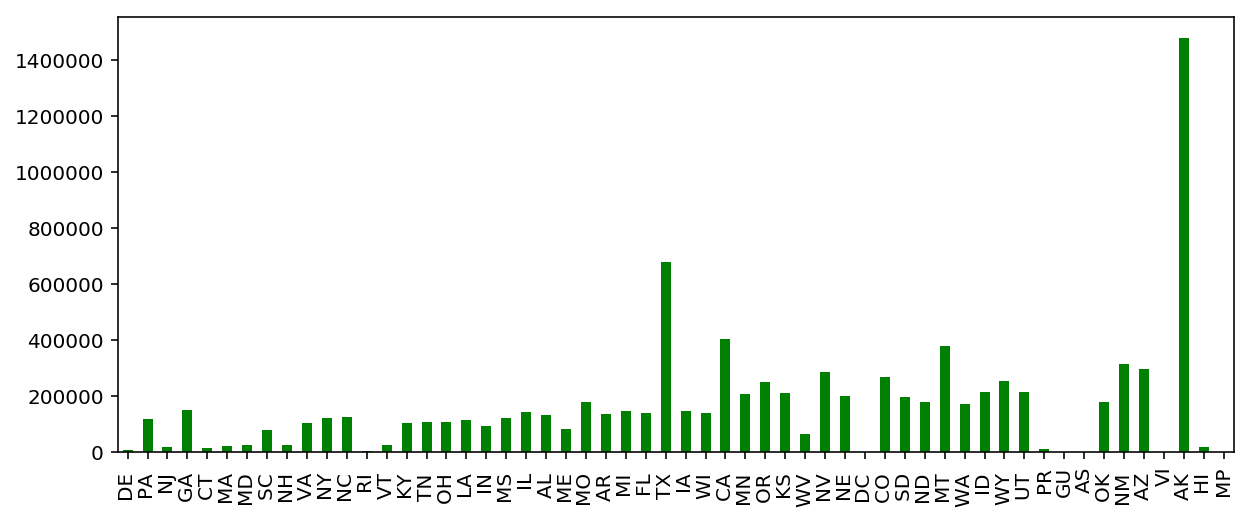

In [61]:
plot = table['Area_land'].plot(kind='bar',color=['green'],figsize=(10,4))
plot.set_xticklabels(table['Abbreviation'])
plot

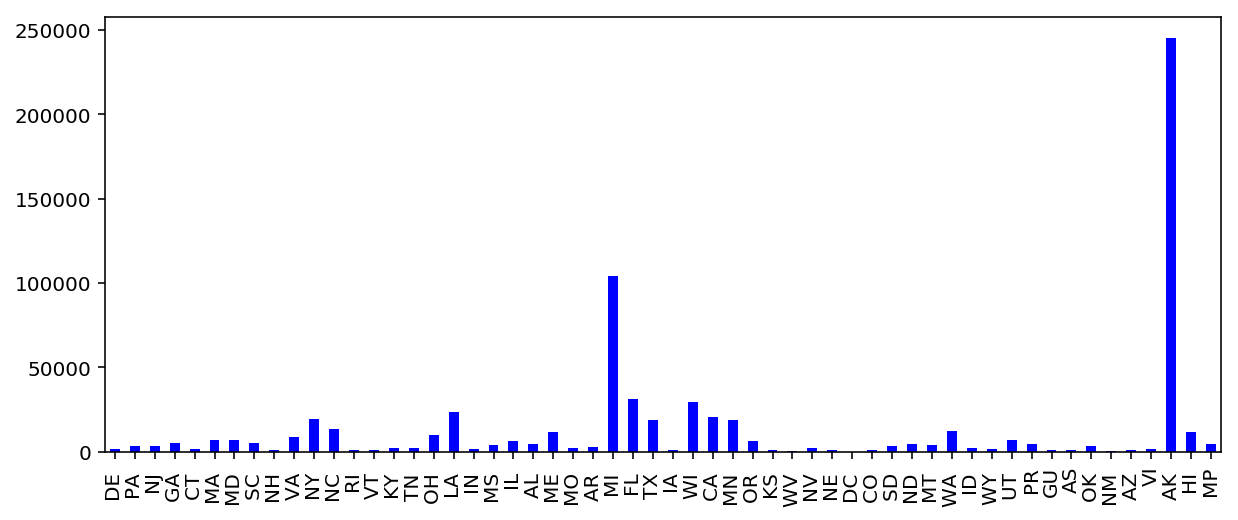

In [62]:
plot = table['Area_water'].plot(kind='bar',color=['blue'],figsize=(10,4))
plot.set_xticklabels(table['Abbreviation'])
plot